In [ ]:
from keras.datasets import mnist
(Xtrain,ytrain),(Xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
Xtrain.shape,Xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
ytrain[5:10],ytest[0:100]


(array([2, 1, 3, 1, 4], dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
        6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
        3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
        6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8))

In [ ]:
ytrain.shape,ytest.shape

((60000,), (10000,))

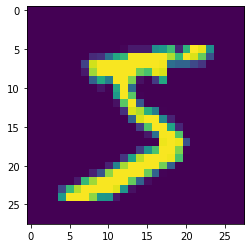

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[0])

In [ ]:
ytrain[0]

5

In [ ]:
Xtrain_r = Xtrain.reshape(60000,28*28)
Xtest_r = Xtest.reshape(10000,28*28)

In [ ]:
Xtrain_r.shape,Xtest_r.shape

((60000, 784), (10000, 784))

In [ ]:
from keras import models, layers
DL_model = models.Sequential()
DL_model.add(layers.Dense(64,activation="relu"))
DL_model.add(layers.Dense(128,activation="relu"))
DL_model.add(layers.Dense(256,activation="relu"))
DL_model.add(layers.Dense(10,activation="softmax"))

In [ ]:
DL_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [ ]:
DNN = DL_model.fit(Xtrain_r,ytrain,epochs=5,batch_size=16)

Epoch 1/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.7630 - acc: 0.8595
Epoch 2/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2444 - acc: 0.9329
Epoch 3/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1983 - acc: 0.9469
Epoch 4/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1731 - acc: 0.9535
Epoch 5/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1542 - acc: 0.9591


In [ ]:

DL_model.evaluate(Xtest_r,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.1745 - acc: 0.9560


[0.17448143661022186, 0.9559999704360962]

In [ ]:
record = DNN.history
record.keys()

dict_keys(['loss', 'acc'])

In [ ]:
record["acc"]

[0.8632333278656006,
 0.9330333471298218,
 0.9465833306312561,
 0.9549999833106995,
 0.9601500034332275]

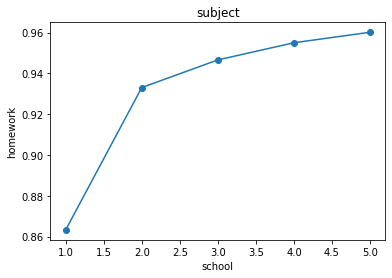

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("school")
plt.ylabel("homework")
plt.title("subject")
plt.plot(np.arange(1,len(record["acc"])+1),record["acc"])
plt.scatter(np.arange(1,len(record["acc"])+1),record["acc"])

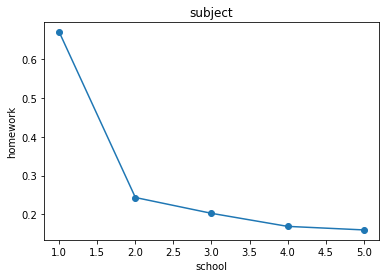

In [ ]:
  import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("school")
plt.ylabel("homework")
plt.title("subject")
plt.plot(np.arange(1,len(record["loss"])+1),record["loss"])
plt.scatter(np.arange(1,len(record["loss"])+1),record["loss"])

## Predicting a simple

In [ ]:
ytest[0]

NameError: ignored

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
DL_model.predict(Xtest_r[[0]])

In [ ]:
DL_model.predict(Xtest_r[[0]]).argmax(axis=1)

In [ ]:
plt.imshow(Xtest_r[[0]].reshape(28,28))

## SLICING PREDICTING IMAGE

In [ ]:
DL_model.predict(Xtest_r[0:10]).argmax(axis=1),ytest[0:10]

## plotting confusion matrix of keras model

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,DL_model.predict(Xtest_r).argmax(axis=1))
cf

In [ ]:
from sklearn.metrics import confusion_matrix
pred = DL_model.predict(Xtest_r).argmax(axis=1)
cf = confusion_matrix(ytest,pred)
cf

In [ ]:
import seaborn as s
s.heatmap(cf,annot=True,fmt="g",cmap="Accent_r")

In [ ]:
from keras import models, layers
DL_model = models.Sequential()
DL_model.add(layers.Dense(64,activation="relu"))
DL_model.add(layers.Dense(128,activation="relu"))
DL_model.add(layers.Dense(256,activation="relu"))
DL_model.add(layers.Dense(10,activation="softmax"))
DL_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["acc"])

DNN_V = DL_model.fit(Xtrain_r,ytrain,epochs=5,validation_split=0.15)

Epoch 1/5
1594/1594 [==============================] - 4s 2ms/step - loss: 0.8651 - acc: 0.8422 - val_loss: 0.3054 - val_acc: 0.9166
Epoch 2/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2607 - acc: 0.9288 - val_loss: 0.2175 - val_acc: 0.9411
Epoch 3/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.1870 - acc: 0.9474 - val_loss: 0.1951 - val_acc: 0.9480
Epoch 4/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.1642 - acc: 0.9538 - val_loss: 0.1677 - val_acc: 0.9568
Epoch 5/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.1443 - acc: 0.9587 - val_loss: 0.1505 - val_acc: 0.9583


In [ ]:
record = DNN_V.history
record.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
train_acc = record["acc"]
train_loss = record["loss"]
valid_acc = record["val_acc"]
valid_loss = record["val_loss"]

plotting validation and training accuracy


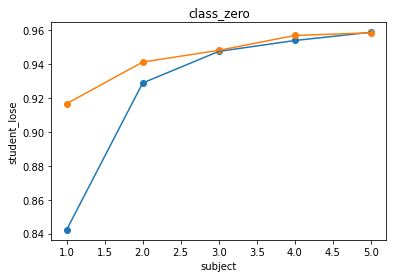

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("subject")
plt.ylabel("student_lose")
plt.title("class_zero")
plt.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.plot(np.arange(1,len(train_acc)+1),valid_acc)
plt.scatter(np.arange(1,len(train_acc)+1),train_acc)
plt.scatter(np.arange(1,len(train_acc)+1),valid_acc)


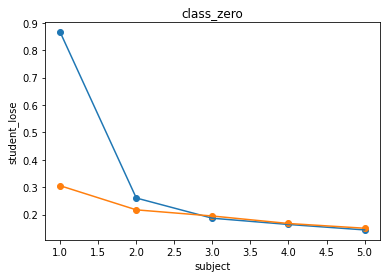

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel("subject")
plt.ylabel("student_lose")
plt.title("class_zero")
plt.plot(np.arange(1,len(train_acc)+1),train_loss)
plt.plot(np.arange(1,len(train_acc)+1),valid_loss)
plt.scatter(np.arange(1,len(train_acc)+1),train_loss)
plt.scatter(np.arange(1,len(train_acc)+1),valid_loss)

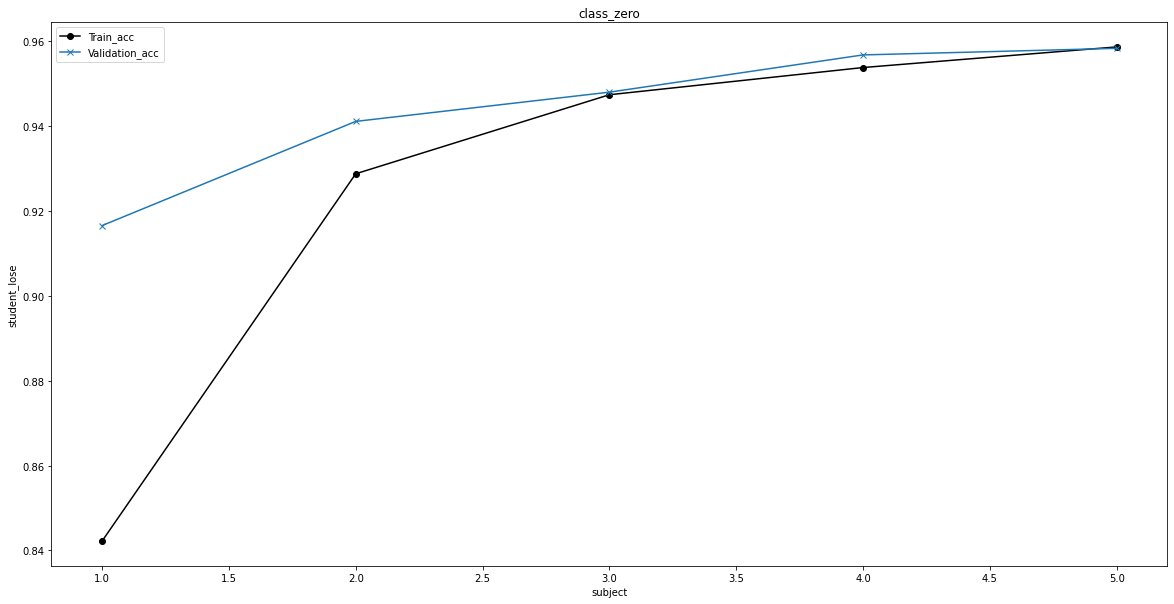

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.xlabel("subject")
plt.ylabel("student_lose")
plt.title("class_zero")
plt.plot(np.arange(1,len(train_acc)+1),train_acc,marker='o',color='black')
plt.plot(np.arange(1,len(train_acc)+1),valid_acc,marker='x')
plt.legend(["Train_acc", "Validation_acc"])
